In [39]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming `df` is your dataset
df = pd.read_csv("/Users/s.vandanov/Documents/GitHub/classification-system-ekog/research/train.csv")
df = df.dropna(subset=['ID', 'LABEL'])

df = df.fillna(0)
df

,X_FROM,X_TO,LABEL,ID,DWT_Energy_Level_1_FrL,DWT_Energy_Level_2_FrL,DWT_Energy_Level_3_FrL,DWT_Energy_Level_4_FrL,DWT_Energy_Level_5_FrL,DWT_Energy_Level_6_FrL,...,DWT_Energy_Level_5_OcR,DWT_Energy_Level_6_OcR,Delta_Power_OcR,Theta_Power_OcR,Alpha_Power_OcR,Beta_Power_OcR,Hjorth_Activity_OcR,Hjorth_Mobility_OcR,Hjorth_Complexity_OcR,Shannon_Entropy_OcR
0,65.0,74.0,swd,Ati4x3,41.736788,115.921150,80.741924,22.575744,1.675793,0.019530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,74.0,86.0,swd,Ati4x3,22.435526,13.295247,5.960773,2.158604,0.309562,0.005267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86.0,97.0,swd,Ati4x3,78.885679,172.981258,106.916182,28.074434,2.159237,0.028285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,97.0,102.0,swd,Ati4x3,7.940347,14.468214,5.511345,2.552433,0.144925,0.002623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,102.0,106.0,swd,Ati4x3,23.980034,55.922019,35.043307,10.074958,0.542615,0.007490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,20631.0,20636.0,swd,Ati4x3,30.200842,68.234215,50.315813,21.313092,1.455576,0.021546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1124,20636.0,20644.0,swd,Ati4x3,20.096978,10.538600,4.150402,1.748251,0.294206,0.004596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1125,20644.0,20649.0,swd,Ati4x3,26.370483,65.663622,65.724688,20.621628,1.381368,0.016610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1126,20649.0,20710.0,swd,Ati4x3,136.431744,89.817796,58.907563,22.668458,2.634455,0.044726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df.LABEL.value_counts()

LABEL
swd    722
ds     333
is      73
Name: count, dtype: int64

In [38]:
df.LABEL.value_counts()

LABEL
2    722
0    333
1     73
Name: count, dtype: int64

In [41]:
label2number = {
    'swd':2,
    'ds':0,
    'is':1
}
number2label = {
    2:'swd',
    0:'ds',
    1:'is'
}

In [21]:
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

cat_features = []

# Encode target labels
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])  # Transform 'ds', 'is', 'swd' into numeric

# Split features and target
X = df.drop(columns=['LABEL','ID', 'X_FROM', 'X_TO'])
y = df['LABEL']

# Initialize CatBoost classifier with categorical features
catboost_params = {
    'iterations': 500,
    # 'depth': 6,
    'loss_function': 'MultiClass'
}
catboost_model = CatBoostClassifier(**catboost_params)

# Cross-validation setup
data_pool = Pool(X, y, cat_features=cat_features)
cv_results = cv(
    params=catboost_params,
    pool=data_pool,
    fold_count=3,
    plot=True,
)

# Print CV results
print(cv_results)

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features)

# Train the model
catboost_model.fit(train_pool, verbose=100)

# Predict and evaluate
y_pred = catboost_model.predict(test_pool)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	learn: 1.0743237	test: 1.0748315	best: 1.0748315 (0)	total: 3.32ms	remaining: 1.66s
1:	learn: 1.0511492	test: 1.0511752	best: 1.0511752 (1)	total: 5.31ms	remaining: 1.32s
2:	learn: 1.0281147	test: 1.0277136	best: 1.0277136 (2)	total: 7.29ms	remaining: 1.21s
3:	learn: 1.0059847	test: 1.0067014	best: 1.0067014 (3)	total: 9.21ms	remaining: 1.14s
4:	learn: 0.9854690	test: 0.9864387	best: 0.9864387 (4)	total: 12ms	remaining: 1.19s
5:	learn: 0.9663913	test: 0.9671485	best: 0.9671485 (5)	total: 13.6ms	remaining: 1.12s
6:	learn: 0.9474594	test: 0.9481841	best: 0.9481841 (6)	total: 15.4ms	remaining: 1.09s
7:	learn: 0.9281488	test: 0.9285796	best: 0.9285796 (7)	total: 17.3ms	remaining: 1.07s
8:	learn: 0.9126584	test: 0.9137972	best: 0.9137972 (8)	total: 18.8ms	remaining: 1.02s
9:	learn: 0.8964776	test: 0.8975151	best: 0.8975151 (9)	total: 20.2ms	remaining: 988ms
10:	learn: 0.8798513	test: 0.8816325	best: 0.8816325 (10)	total: 21.8ms	remaining: 971ms
11:	learn: 0.8642693

In [65]:
First = pd.read_csv('/Users/s.vandanov/Documents/GitHub/classification-system-ekog/research/test.csv')
first_col = First[First.ID=='TEST1']
second = First[First.ID=='TEST2']

In [66]:
test_pool = Pool(second.drop(columns=['LABEL','ID', 'X_FROM', 'X_TO']), cat_features=cat_features)

# Train the model
# catboost_model.fit(train_pool, verbose=100)

# Predict and evaluate
y_pred = catboost_model.predict(test_pool)
y_pred

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [67]:
new_y_pred = y_pred.reshape(-1)
label2number = {
    'swd':2,
    'ds':0,
    'is':1
}
number2label = {
    2:'swd',
    0:'ds',
    1:'is'
}


In [68]:
new_list = []
for i in new_y_pred:
    new_list.append(number2label[i])
new_list

['swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'is',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'ds',
 'swd',
 'is',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'ds',
 'ds',
 'ds',
 'swd',
 'swd',
 'swd',
 'ds',
 'swd',
 'swd',
 'ds',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd',
 'swd']

In [69]:
second["LABEL"] = new_list
second

/var/folders/b6/hs82fhv10h35l3krx6tyhln00000gq/T/ipykernel_739/3226550812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second["LABEL"] = new_list


,X_FROM,X_TO,LABEL,ID,DWT_Energy_Level_1_FrL,DWT_Energy_Level_2_FrL,DWT_Energy_Level_3_FrL,DWT_Energy_Level_4_FrL,DWT_Energy_Level_5_FrL,DWT_Energy_Level_6_FrL,...,DWT_Energy_Level_5_OcR,DWT_Energy_Level_6_OcR,Delta_Power_OcR,Theta_Power_OcR,Alpha_Power_OcR,Beta_Power_OcR,Hjorth_Activity_OcR,Hjorth_Mobility_OcR,Hjorth_Complexity_OcR,Shannon_Entropy_OcR
0,0.0,20.0,swd,TEST2,20.156334,10.053928,6.603232,2.087405,0.256692,0.004531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20.0,40.0,swd,TEST2,47.164590,17.664853,13.279960,2.502379,0.230733,0.003843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40.0,60.0,swd,TEST2,36.685624,23.078822,9.065475,2.200451,0.207633,0.003487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60.0,80.0,swd,TEST2,48.794489,18.285938,8.220218,2.344597,0.261381,0.004025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80.0,100.0,swd,TEST2,62.717446,22.373945,14.691436,2.785529,0.242860,0.004347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1700.0,1720.0,swd,TEST2,35.083849,12.623260,7.944265,1.825533,0.266189,0.003878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1720.0,1740.0,swd,TEST2,39.888259,10.294805,7.017628,1.750565,0.166791,0.003211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,1740.0,1760.0,swd,TEST2,57.044640,15.206663,8.659116,2.354623,0.211261,0.003784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,1760.0,1780.0,swd,TEST2,43.985309,11.795446,6.783764,1.784207,0.238281,0.004467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
dd = second.copy()
df_dropped = dd.sample(frac=0.65, random_state=42).reset_index(drop=True)

df_dropped


,X_FROM,X_TO,LABEL,ID,DWT_Energy_Level_1_FrL,DWT_Energy_Level_2_FrL,DWT_Energy_Level_3_FrL,DWT_Energy_Level_4_FrL,DWT_Energy_Level_5_FrL,DWT_Energy_Level_6_FrL,...,DWT_Energy_Level_5_OcR,DWT_Energy_Level_6_OcR,Delta_Power_OcR,Theta_Power_OcR,Alpha_Power_OcR,Beta_Power_OcR,Hjorth_Activity_OcR,Hjorth_Mobility_OcR,Hjorth_Complexity_OcR,Shannon_Entropy_OcR
0,800.0,820.0,swd,TEST2,5.428196,3.182387,2.665036,2.491725,0.387222,0.007402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,440.0,460.0,swd,TEST2,36.935550,21.545933,12.900713,2.438027,0.265779,0.003812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1100.0,1120.0,swd,TEST2,28.661195,13.581616,11.675760,2.403103,0.266425,0.004256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1400.0,1420.0,swd,TEST2,41.168869,36.947087,24.028890,4.039131,0.335373,0.004852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,20.0,swd,TEST2,20.156334,10.053928,6.603232,2.087405,0.256692,0.004531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,520.0,540.0,swd,TEST2,48.485242,17.949621,10.057858,2.290026,0.220498,0.003985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,780.0,800.0,swd,TEST2,4.702315,3.089547,2.291774,2.729430,0.503988,0.009235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1300.0,1320.0,swd,TEST2,13.157338,7.852689,5.273650,2.052789,0.256611,0.003996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,200.0,220.0,swd,TEST2,46.105410,25.584645,10.775475,2.378922,0.221466,0.003807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,880.0,900.0,ds,TEST2,44.480266,47.918978,48.373721,14.553036,1.238747,0.017003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_dropped.to_csv("ANSWER_TEST2.csv",index=False)

In [57]:
X_test

,DWT_Energy_Level_1_FrL,DWT_Energy_Level_2_FrL,DWT_Energy_Level_3_FrL,DWT_Energy_Level_4_FrL,DWT_Energy_Level_5_FrL,DWT_Energy_Level_6_FrL,Delta_Power_FrL,Theta_Power_FrL,Alpha_Power_FrL,Beta_Power_FrL,...,DWT_Energy_Level_5_OcR,DWT_Energy_Level_6_OcR,Delta_Power_OcR,Theta_Power_OcR,Alpha_Power_OcR,Beta_Power_OcR,Hjorth_Activity_OcR,Hjorth_Mobility_OcR,Hjorth_Complexity_OcR,Shannon_Entropy_OcR
1091,33.410941,96.596217,62.588016,26.691344,1.874151,0.025174,0.011106,0.037934,0.025918,0.016123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,331.631883,196.435887,128.735461,26.731135,2.642064,0.040490,0.005816,0.004667,0.002827,0.000819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739,911.054271,509.781135,314.017789,78.151459,8.795835,0.145300,0.004064,0.003164,0.001675,0.000654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,11.655405,5.005156,1.948049,0.717909,0.067371,0.001287,0.007485,0.003769,0.000853,0.000859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1019,163.844963,251.741790,126.876999,36.692302,4.286287,0.069556,0.002675,0.005755,0.002039,0.000996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,22.947389,12.296277,7.476622,1.214743,0.101388,0.001713,0.006078,0.004080,0.001630,0.000497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
429,802.394651,377.372343,241.295686,69.882967,7.225377,0.113799,0.006456,0.003876,0.002166,0.000969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,28.696066,74.164281,42.226724,8.590812,0.682305,0.008392,0.010858,0.032057,0.018407,0.007210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036,14.216493,2.405337,4.740848,1.442027,0.103442,0.001746,0.001574,0.001486,0.000510,0.000843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
label_encoder.inverse_transform(df['LABEL'])


array([2, 2, 2, ..., 2, 2, 2])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2])

In [36]:
label_encoder.inverse_transform(y_pred)

/Users/s.vandanov/Documents/GitHub/classification-system-ekog/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2])

In [ ]:
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])  # Transform 'ds', 'is', 'swd' into numeric


In [15]:
label_encoder.transform(y_pred)

/Users/s.vandanov/Documents/GitHub/classification-system-ekog/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 1, 1, 0])

In [17]:
# сформировать новую колонку
X_test['prediction'] = label_encoder.transform(y_pred)
X_test
# отдать это дане

/Users/s.vandanov/Documents/GitHub/classification-system-ekog/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,AGE_MONTHS,EXPERIMENT_TYPE,DWT_Energy_Level_1_FrL,DWT_Energy_Level_2_FrL,DWT_Energy_Level_3_FrL,DWT_Energy_Level_4_FrL,DWT_Energy_Level_5_FrL,DWT_Energy_Level_6_FrL,Delta_Power_FrL,Theta_Power_FrL,...,DWT_Energy_Level_6_OcR,Delta_Power_OcR,Theta_Power_OcR,Alpha_Power_OcR,Beta_Power_OcR,Hjorth_Activity_OcR,Hjorth_Mobility_OcR,Hjorth_Complexity_OcR,Shannon_Entropy_OcR,prediction
1467,12m,BL,16.944500,54.784896,39.757938,12.246094,1.036218,0.014117,0.014744,0.030363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
70,9m,Xyl01(Pharm!),5.741374,7.691028,3.632959,0.671883,0.088342,0.001458,0.004912,0.003983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
131,9m,Xyl01(Pharm!),14.854989,37.965872,13.152216,2.922488,0.194694,0.002758,0.005673,0.012264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1074,14m,BL,107.242643,267.419159,239.837065,81.228025,6.739707,0.084286,0.015277,0.037576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1501,12m,BL,18.949739,84.408602,43.806683,7.012021,0.735960,0.010696,0.003300,0.026245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,9m,Xyl01(Pharm!),41.640533,30.097487,16.383950,3.459071,0.318786,0.004839,0.005519,0.005023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
75,9m,Xyl01(Pharm!),79.510902,83.619335,40.549630,16.468062,1.327762,0.019389,0.006399,0.005401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
671,15m,BL,33.629676,50.535708,26.407593,6.467633,0.562737,0.008235,0.003939,0.013979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1095,14m,BL,24.196946,65.895621,30.751284,8.014186,0.697091,0.010768,0.002412,0.009189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [22]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


TypeError: object of type 'numpy.int64' has no len()

<Figure size 640x480 with 0 Axes>

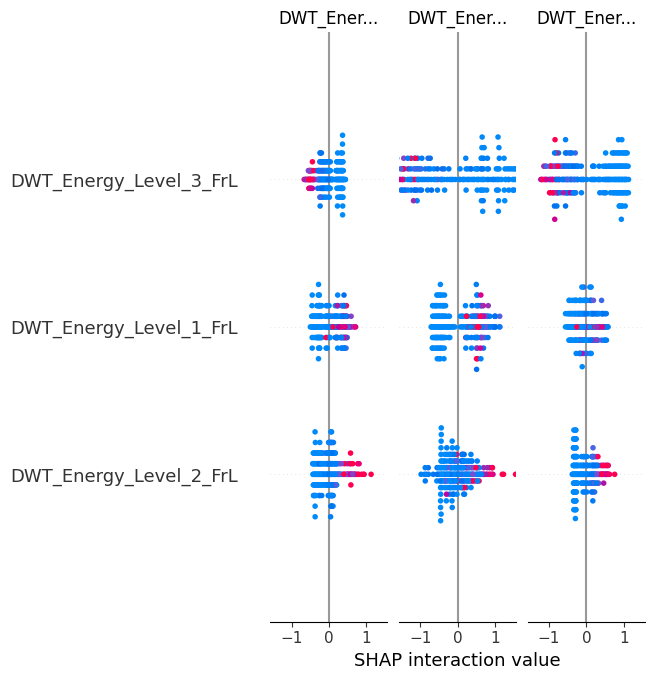

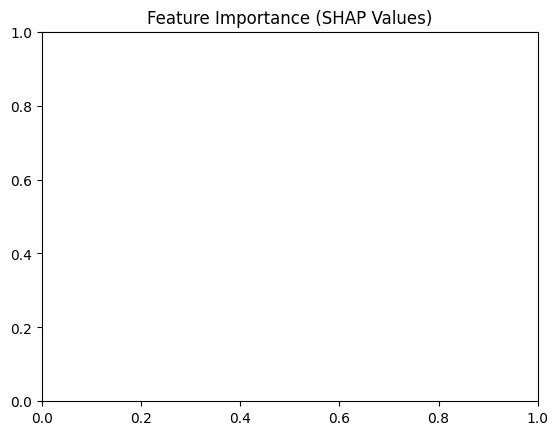

<Figure size 640x480 with 0 Axes>

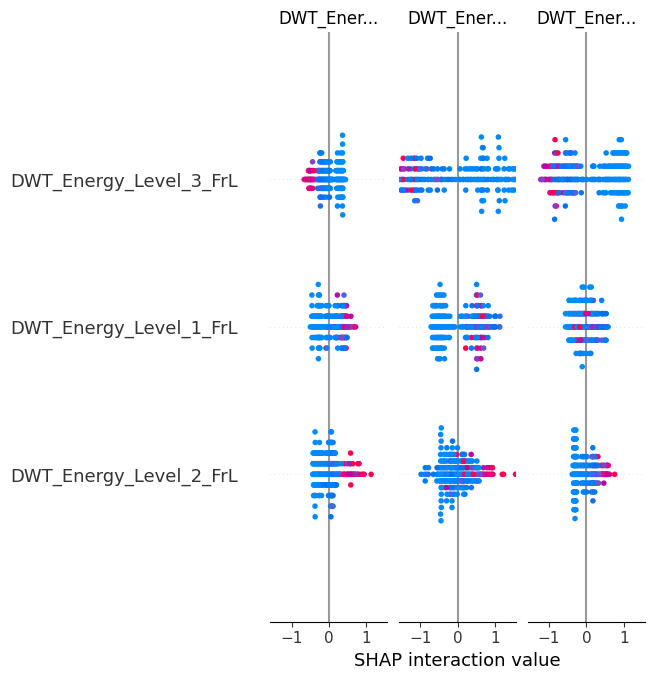

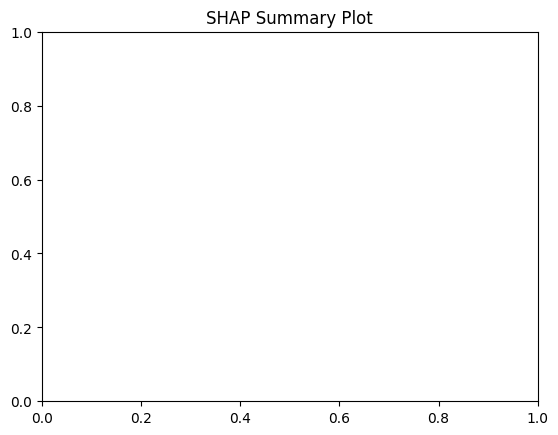

In [23]:
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# SHAP Feature Importance
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for feature importance
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("Feature Importance (SHAP Values)")
plt.show()

# SHAP Summary Plot (detailed)
plt.figure()
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot")
plt.show()

<Figure size 640x480 with 0 Axes>

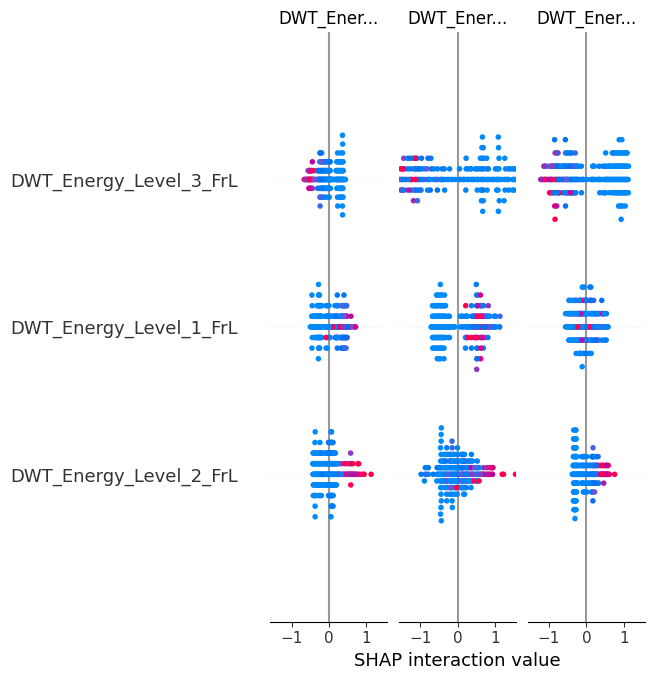

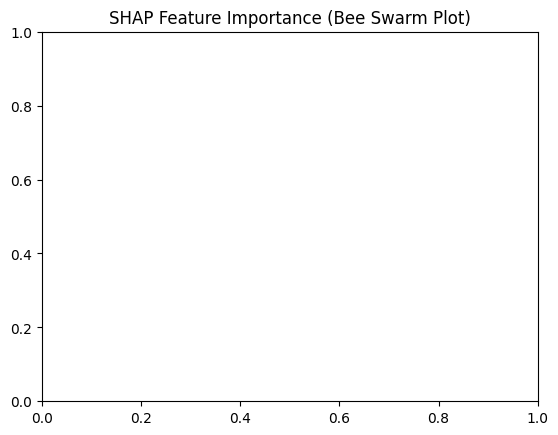

/var/folders/b6/hs82fhv10h35l3krx6tyhln00000gq/T/ipykernel_739/2226233469.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


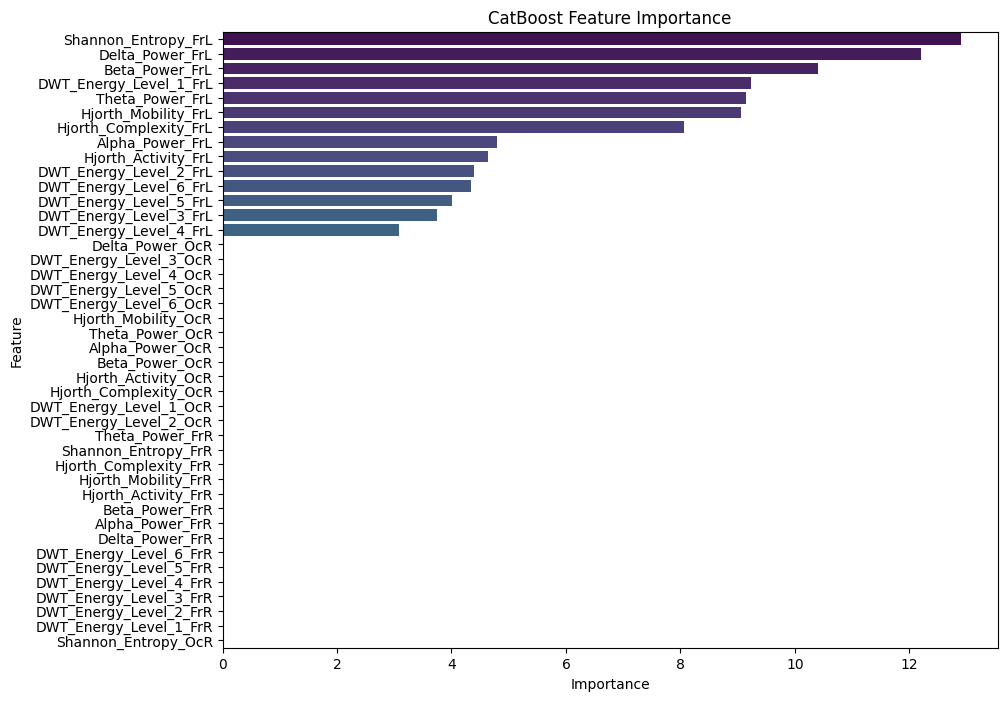

In [24]:

# SHAP Feature Importance (Bee Swarm Plot)
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (Bee Swarm)
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="dot")  # 'dot' for bee swarm
plt.title("SHAP Feature Importance (Bee Swarm Plot)")
plt.show()

# CatBoost Built-in Feature Importance
feature_importances = catboost_model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot CatBoost Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()